In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
from automakeup import dlib_predictor_path
from automakeup.face import face_extraction, bounding
from imagine.color.conversion import BgrToRgb
from importlib import resources
from mtcnn import MTCNN

In [2]:
img_path = "face.jpg"

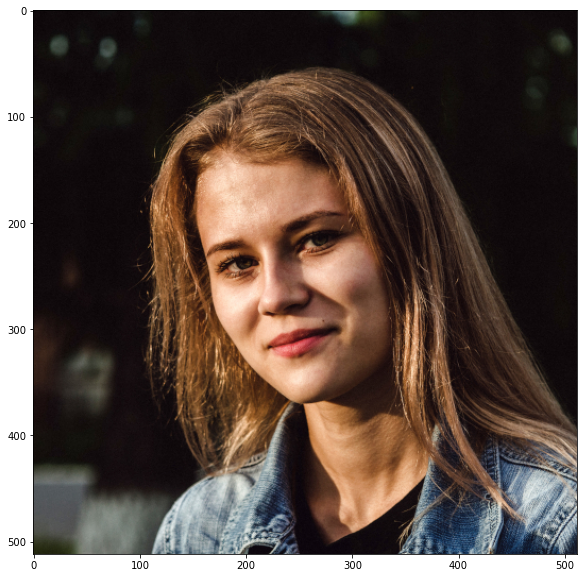

In [3]:
image = BgrToRgb(cv2.imread(img_path))
plt.figure(figsize=(10,10))
plt.imshow(image)

In [4]:
with resources.path("automakeup.resources", dlib_predictor_path) as dlib_path:
    predictor = dlib.shape_predictor(str(dlib_path))

In [5]:
mtcnn = MTCNN()

In [6]:
extractor1 = face_extraction.SimpleFaceExtractor(512, interpolation=cv2.INTER_CUBIC)
extractor2 = face_extraction.AligningDlibFaceExtractor(512, predictor)
bb_finder1 = bounding.DlibBoundingBoxFinder()
bb_finder2 = bounding.MTCNNBoundingBoxFinder(mtcnn)

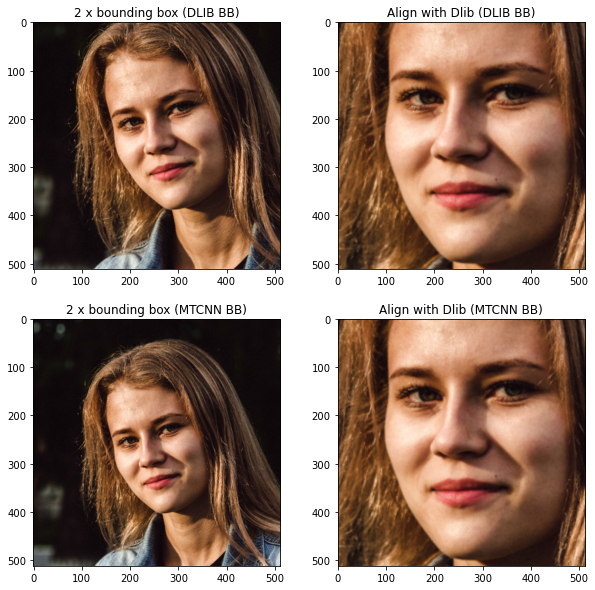

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

bb = bb_finder1.find(image)

axs[0][0].imshow(extractor1.extract(image, bb))
axs[0][0].title.set_text("2 x bounding box (DLIB BB)")
axs[0][1].imshow(extractor2.extract(image, bb))
axs[0][1].title.set_text("Align with Dlib (DLIB BB)")

bb = bb_finder2.find(image)

axs[1][0].imshow(extractor1.extract(image, bb))
axs[1][0].title.set_text("2 x bounding box (MTCNN BB)")
axs[1][1].imshow(extractor2.extract(image, bb))
axs[1][1].title.set_text("Align with Dlib (MTCNN BB)")